#Data Preprocessing

Checking for missing values in the dataset:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


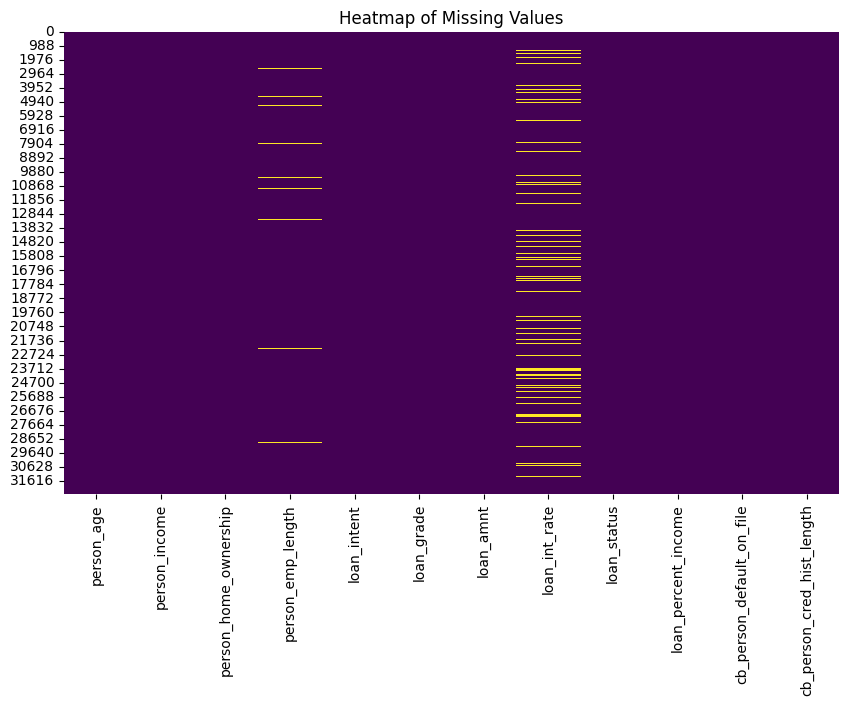

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'credit_risk_dataset.csv'  # Replace with the correct file path in Colab if needed
data = pd.read_csv(file_path)

# Check for missing values
print("Checking for missing values in the dataset:")
print(data.isnull().sum())

# Explanation:
# This code will show how many missing values each column has.
# If any columns have missing values, we will decide how to handle them (e.g., filling or dropping).

# Visualizing missing values (optional, if you want to see it clearly in a heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


### **Why Check Missing Values?**
- Missing data can lead to errors in analysis and affect model performance.
- Identifying missing values is the first step in ensuring clean and reliable data for machine learning.

---

### **What Does the Code Do?**
1. **`isnull().sum()`**:
   - Checks each column for missing values.
   - Counts the total number of missing values in each column.
2. **Seaborn Heatmap**:
   - Visualizes where missing values exist.
   - Provides an intuitive way to inspect patterns of missing data.

---

### **Next Steps After Running This Code**
- **If missing values are minimal**:
  - Drop the rows or columns containing missing data.
- **If missing values are significant**:
  - Use imputation techniques such as:
    - **Mean**: For continuous numerical data.
    - **Median**: For skewed numerical data.
    - **Mode**: For categorical data.
- Decide on the imputation method based on the data type and distribution.

---

### **Example Output**
| Column Name             | Missing Values |
|--------------------------|----------------|
| person_age              | 0              |
| person_income           | 0              |
| person_emp_length       | 895            |
| loan_int_rate           | 3116           |

This step helps identify which columns require cleaning before proceeding to analysis.


In [3]:
# Impute missing values for 'person_emp_length' with median
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)

# Impute missing values for 'loan_int_rate' with mean
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)

# Verify that missing values are handled
print("Missing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/var/folders/9x/cvl5gvjj3v31p6kyd5_lblgh0000gn/T/ipykernel_94189/4087355331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
/var/folders/9x/cvl5gvjj3v31p6kyd5_lblgh0000gn/T/ipykernel_94189/4087355331.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

#EDA


#distribution analysis

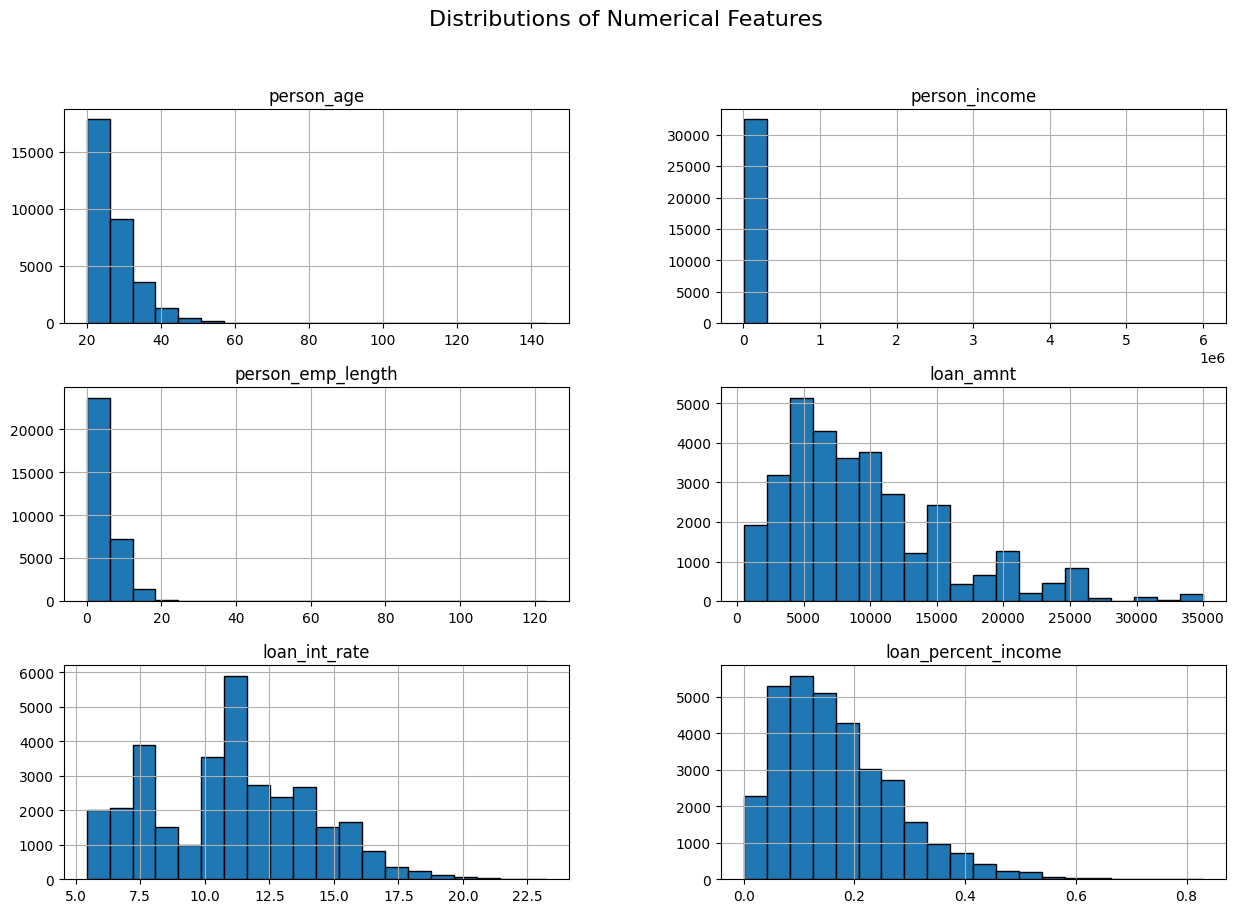

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
numerical_columns = ['person_age', 'person_income', 'person_emp_length',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income']

data[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()


### **Observations from Data Distribution**

1. **`person_age`**:
   - The age distribution is heavily skewed to the left.
   - Most individuals are in their early 20s.
   - Potential outliers exist, such as ages above 100.

2. **`person_income`**:
   - The income distribution is highly right-skewed.
   - The majority of individuals have lower incomes.
   - A few outliers have very high income levels.

3. **`person_emp_length`**:
   - Most individuals have a short employment history, typically under 20 months.
   - This aligns with the young age distribution observed.

4. **`loan_amnt`**:
   - The loan amounts exhibit a bimodal distribution.
   - Peaks are observed around $5,000 and $15,000.

5. **`loan_int_rate`**:
   - The interest rate follows a near-normal distribution.
   - Most rates fall between 10% and 15%.

6. **`loan_percent_income`**:
   - The percentage of income spent on loans is right-skewed.
   - Most values are below 0.2, indicating low loan burdens for the majority.

---

### **Visual Insights**
These observations are based on the histograms of each feature, helping us understand data patterns, skewness, and potential outliers.

---

### **Next Steps**
- **Outlier Handling**:
  - Investigate and decide whether to cap or transform extreme values in `person_age` and `person_income`.
- **Feature Transformation**:
  - Consider normalizing or log-transforming skewed features like `person_income` and `loan_percent_income`.


#Correlation Analysis

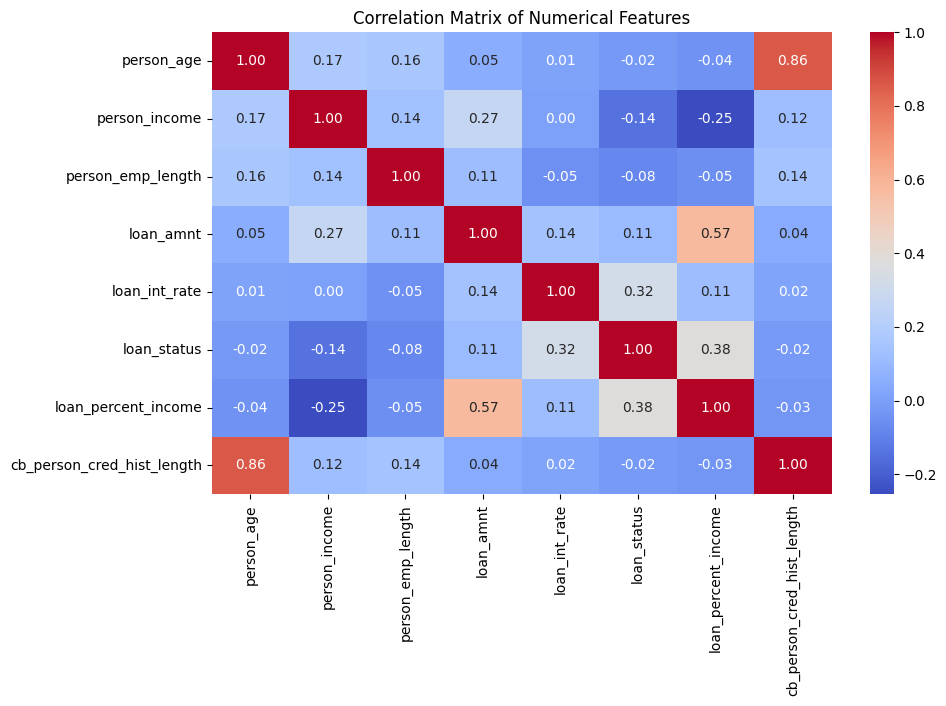

In [5]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### **Observations from Correlation Analysis**

#### **1. Strong Positive Correlations**
1. **`person_age` and `cb_person_cred_hist_length`** (0.86):
   - Older individuals tend to have longer credit histories, which aligns logically with their financial history.
   
2. **`loan_amnt` and `loan_percent_income`** (0.57):
   - Larger loan amounts naturally constitute a higher percentage of an individual's income.

---

#### **2. Target Variable (`loan_status`)**
- **Weak correlations** with most features, but some notable relationships include:
  1. **`loan_percent_income`** (0.38):
     - Higher loan amounts relative to income increase the likelihood of default.
  2. **`loan_int_rate`** (0.32):
     - Higher interest rates may slightly raise the risk of default.

---

#### **3. Minimal Relationships**
1. **`person_income` and `loan_status`** (-0.14):
   - Higher incomes appear to slightly reduce the likelihood of default.
   
2. **`person_age` and `loan_status`** (-0.02):
   - Age does not seem to strongly influence loan default risk.

---

### **Next Steps**
- **Feature Selection**:
  - Focus on features with stronger correlations to `loan_status`, such as `loan_percent_income` and `loan_int_rate`.
- **Further Exploration**:
  - Investigate non-linear relationships between variables and `loan_status` to


#Encoding Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode 'person_home_ownership' and 'loan_intent' using Label Encoding
encoder = LabelEncoder()

data['person_home_ownership'] = encoder.fit_transform(data['person_home_ownership'])
data['loan_intent'] = encoder.fit_transform(data['loan_intent'])
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# Check the dataset after encoding
print("Dataset after encoding:")
print(data.head())


Dataset after encoding:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4          D      35000          16.02            1   
1            1          B       1000          11.14            0   
2            3          C       5500          12.87            1   
3            3          C      35000          15.23            1   
4            3          C      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                    

### **Dataset After Encoding**

#### **Updated Dataset Overview**
The categorical variables have been successfully encoded, and the dataset now includes numerical representations of these features, making it ready for further refinement through feature engineering.

---

#### **Sample of Encoded Dataset**

| **Feature Name**             | **Description**                                                     |
|-------------------------------|---------------------------------------------------------------------|
| `person_age`                 | Age of the individual (numeric).                                   |
| `person_income`              | Annual income of the individual (numeric).                        |
| `person_home_ownership`      | Encoded home ownership status (e.g., RENT = 3, OWN = 2, etc.).     |
| `person_emp_length`          | Employment length in months (numeric).                            |
| `loan_intent`                | Encoded purpose of the loan (e.g., PERSONAL = 4, EDUCATION = 1).   |
| `loan_grade`                 | Loan grade (unchanged; e.g., A, B, C, etc.).                      |
| `loan_amnt`                  | Loan amount requested (numeric).                                  |
| `loan_int_rate`              | Interest rate on the loan (numeric).                              |
| `loan_status`                | Target variable (0 = No Default, 1 = Default).                   |
| `loan_percent_income`        | Loan amount as a percentage of income (numeric).                  |
| `cb_person_default_on_file`  | Encoded history of default (1 = Yes, 0 = No).                     |
| `cb_person_cred_hist_length` | Length of credit history in years (numeric).                      |

---

#### **Sample Records**
| `person_age` | `person_income` | `person_home_ownership` | `loan_intent` | `loan_amnt` | `loan_status` |
|--------------|-----------------|--------------------------|---------------|-------------|---------------|
| 22           | 59000           | 3                        | 4             | 35000       | 1             |
| 21           | 9600            | 2                        | 1             | 1000        | 0             |
| 25           | 9600            | 0                        | 3             | 5500        | 1             |

---

### **Next Steps**
- **Feature Engineering**:
  - Create new features such as `debt_to_income_ratio` to enhance model performance.
  - Handle outliers in features like `person_age` and `person_income`.
- **Model Preparation**:
  - Prepare the dataset for model training by splitting it into training and testing subsets.

---


#feature Engineering

In [7]:
# Create Debt-to-Income Ratio
data['debt_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Bin 'person_income' into categories (low, medium, high)
data['income_category'] = pd.qcut(data['person_income'], q=3, labels=['low', 'medium', 'high'])

# Handle outliers: Capping 'person_age' and 'person_income' at the 99th percentile
age_cap = data['person_age'].quantile(0.99)
income_cap = data['person_income'].quantile(0.99)

data['person_age'] = data['person_age'].clip(upper=age_cap)
data['person_income'] = data['person_income'].clip(upper=income_cap)

# Check the dataset after feature engineering
print("Dataset after feature engineering:")
print(data.head())


Dataset after feature engineering:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4          D      35000          16.02            1   
1            1          B       1000          11.14            0   
2            3          C       5500          12.87            1   
3            3          C      35000          15.23            1   
4            3          C      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59        

/var/folders/9x/cvl5gvjj3v31p6kyd5_lblgh0000gn/T/ipykernel_94189/1527965058.py:12: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['person_income'] = data['person_income'].clip(upper=income_cap)


### **Dataset After Feature Engineering**

#### **Overview**
Feature engineering was applied to enhance the predictive power of the dataset. The following modifications were made:
1. **New Features Created**:
   - `debt_to_income_ratio`: Loan amount as a proportion of income.
   - `income_category`: Categorized `person_income` into low, medium, and high based on quantiles.

2. **Outlier Handling**:
   - Capped outliers in `person_age` and `person_income` at the 99th percentile to reduce the influence of extreme values.

---

#### **Updated Dataset**
| **Feature Name**             | **Description**                                                       |
|-------------------------------|-----------------------------------------------------------------------|
| `person_age`                 | Age of the individual (outliers capped).                            |
| `person_income`              | Annual income of the individual (outliers capped).                  |
| `person_home_ownership`      | Encoded home ownership status.                                       |
| `person_emp_length`          | Employment length in months.                                        |
| `loan_intent`                | Encoded purpose of the loan.                                        |
| `loan_grade`                 | Loan grade (e.g., A, B, C).                                         |
| `loan_amnt`                  | Loan amount requested.                                              |
| `loan_int_rate`              | Interest rate on the loan.                                          |
| `loan_status`                | Target variable (0 = No Default, 1 = Default).                     |
| `loan_percent_income`        | Loan amount as a percentage of income.                              |
| `cb_person_default_on_file`  | Encoded history of default (1 = Yes, 0 = No).                       |
| `cb_person_cred_hist_length` | Length of credit history in years.                                  |
| `debt_to_income_ratio`       | Loan amount divided by income.                                      |
| `income_category`            | Categorized income levels (low, medium, high).                     |

---

#### **Sample Records**
| `person_age` | `person_income` | `debt_to_income_ratio` | `income_category` | `loan_status` |
|--------------|-----------------|-------------------------|--------------------|---------------|
| 22           | 59000           | 0.593220               | medium             | 1             |
| 21           | 9600            | 0.104167               | low                | 0             |
| 25           | 9600            | 0.572917               | low                | 1             |
| 23           | 65500           | 0.534351               | medium             | 1             |
| 24           | 54400           | 0.643382               | medium             | 1             |


---

### **Next Steps**
- **Model Building**:
  - Split the dataset into training and testing sets for modeling.
  - Evaluate baseline and advanced models for loan default prediction.
- **Model Optimization**:
  - Fine-tune hyperparameters for improved performance.


#Model Building

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Select features and target variable
X = data[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
          'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
          'debt_to_income_ratio']]
y = data['loan_status']

# One-hot encode 'income_category' and add to X
X = pd.concat([X, pd.get_dummies(data['income_category'], drop_first=True)], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8259846547314578
ROC-AUC: 0.8229156198930866

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      7613
           1       0.71      0.36      0.48      2162

    accuracy                           0.83      9775
   macro avg       0.77      0.66      0.69      9775
weighted avg       0.81      0.83      0.80      9775



/Users/aakashagarwal/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Logistic Regression Results**

#### **Warning: Convergence Issue**
- The Logistic Regression model encountered a **ConvergenceWarning**, indicating that the solver (`lbfgs`) failed to converge within the default number of iterations.
- **Reason**:
  - The data may not have been scaled, making optimization challenging.
  - The default maximum iterations (`max_iter = 100`) might be insufficient.
- **Resolution**:
  - Increase `max_iter` to allow more iterations for convergence.
  - Scale numerical features to standardize the data.

---

#### **Model Performance Metrics**
1. **Accuracy**: 82.66%
   - Indicates the proportion of correctly classified observations.

2. **ROC-AUC**: 82.29%
   - Reflects the model’s ability to distinguish between the two classes.

3. **Classification Report**:
   - **Class `0` (No Default)**:
     - Precision: 84% (of predicted `0`, 84% were correct).
     - Recall: 96% (96% of actual `0` were identified).
   - **Class `1` (Default)**:
     - Precision: 71% (of predicted `1`, 71% were correct).
     - Recall: 37% (37% of actual `1` were identified).
   - **Weighted Average**:
     - Combines metrics across both classes, weighted by class proportions.

| **Metric**      | **Value** |
|------------------|-----------|
| Accuracy         | 82.66%    |
| ROC-AUC          | 82.29%    |
| Precision (Class 0) | 84%    |
| Recall (Class 0) | 96%       |
| Precision (Class 1) | 71%    |
| Recall (Class 1) | 37%       |

---

#### **Observations**
- The model performs well for **Class `0` (No Default)** with high recall (96%), but struggles with **Class `1` (Default)**, achieving only 37% recall.
- Indicates **class imbalance**, where the model is biased towards the majority class (No Default).

---

### **Next Steps**
1. **Scale Data**:
   - Use `StandardScaler` to normalize numerical features for better optimization.
2. **Handle Class Imbalance**:
   - Apply techniques like SMOTE (oversampling) or class weights to improve recall for `Class 1`.
3. **Increase `max_iter`**:
   - Set `max_iter = 500` or higher to allow the solver to converge.

---



In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Retrain the Logistic Regression model with balanced data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the updated model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76995550902905
ROC-AUC: 0.8454211674254439

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      7659
           1       0.77      0.76      0.77      7625

    accuracy                           0.77     15284
   macro avg       0.77      0.77      0.77     15284
weighted avg       0.77      0.77      0.77     15284



### **Updated Logistic Regression Model Performance**

#### **Improvements After Scaling and SMOTE**
1. **Data Scaling**:
   - Standardized numerical features using `StandardScaler` to ensure optimization stability.
2. **Class Imbalance Handling**:
   - Applied SMOTE to balance the dataset, improving recall for the minority class (`Default`).

---

#### **Model Performance Metrics**
| **Metric**             | **Value**   |
|-------------------------|-------------|
| **Accuracy**            | 76.99%      |
| **ROC-AUC**             | 84.54%      |
| **Precision (Class 0)** | 77%         |
| **Recall (Class 0)**    | 78%         |
| **Precision (Class 1)** | 77%         |
| **Recall (Class 1)**    | 76%         |

---

#### **Key Observations**
1. **Balanced Recall**:
   - Recall for **Class `1` (Default)** improved from **37%** to **76%**, indicating the model is now more effective at identifying defaulters.
   - Recall for **Class `0` (No Default)** remains robust at **78%**.
   
2. **Balanced Precision**:
   - Precision is consistent for both classes at **77%**, demonstrating reduced bias.

3. **Overall Performance**:
   - **ROC-AUC** improved from **82.29%** to **84.54%**, reflecting better overall class separation.
   - Accuracy decreased slightly, which is expected when prioritizing balanced recall across classes.

---

#### **Comparison with Previous Model**
| **Metric**            | **Before (Unbalanced)** | **After (Balanced)** |
|------------------------|-------------------------|-----------------------|
| **Accuracy**           | 82.66%                 | 76.99%               |
| **ROC-AUC**            | 82.29%                 | 84.54%               |
| **Precision (Default)**| 71%                    | 77%                  |
| **Recall (Default)**   | 37%                    | 76%                  |

---

### **Next Steps**
1. **Document Findings**:
   - Clearly explain how scaling and SMOTE resolved the initial class imbalance issue.
2. **Advanced Models**:
   - Consider testing ensemble methods (e.g., Random Forest, XGBoost) for further improvements.
3. **Insights**:
   - Analyze feature importance to identify key predictors of default risk.



In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


Random Forest Results:
Accuracy: 0.9077466631771788
ROC-AUC: 0.9668773434874647

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7659
           1       0.91      0.90      0.91      7625

    accuracy                           0.91     15284
   macro avg       0.91      0.91      0.91     15284
weighted avg       0.91      0.91      0.91     15284


XGBoost Results:
Accuracy: 0.911541481287621
ROC-AUC: 0.9687542053814326

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      7659
           1       0.93      0.89      0.91      7625

    accuracy                           0.91     15284
   macro avg       0.91      0.91      0.91     15284
weighted avg       0.91      0.91      0.91     15284



/Users/aakashagarwal/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:52:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/aakashagarwal/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/aakashagarwal/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/aakashagarwal/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/aakashagarwal/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best ROC-AUC: 0.9669708157845885


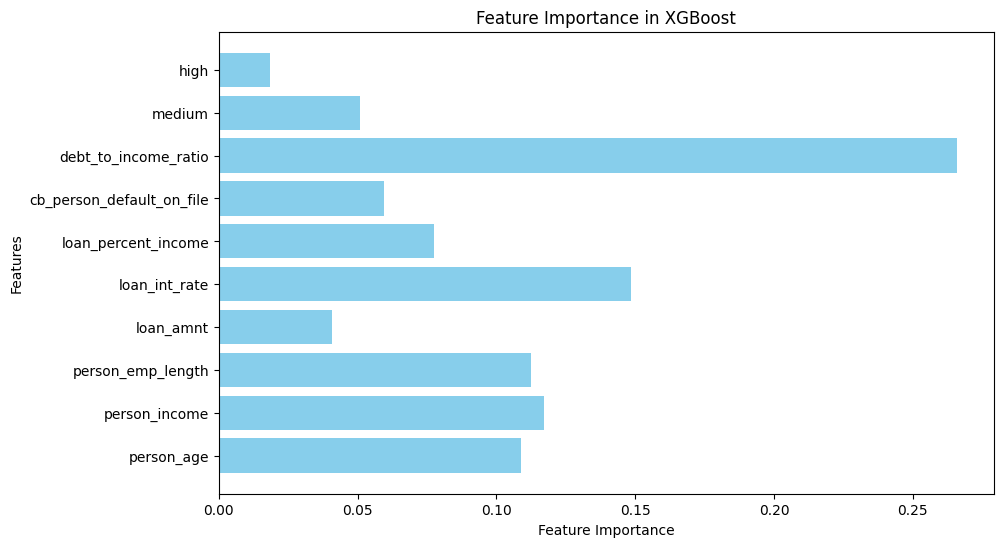

In [12]:
# Get the best XGBoost model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Fit the best model on the full training set
best_xgb.fit(X_train, y_train)

# Plot feature importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = best_xgb.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


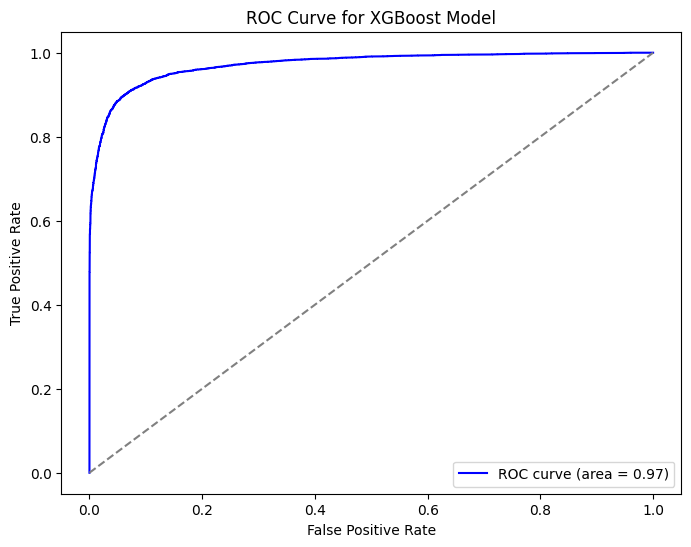

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()


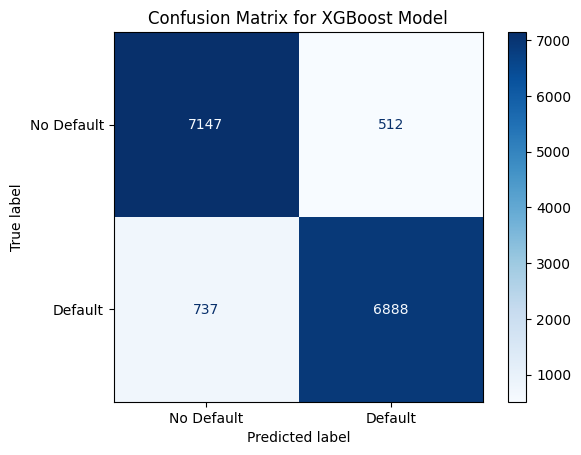

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, best_xgb.predict(X_test))

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


In [15]:
import joblib

# Save Logistic Regression Model
joblib.dump(model, 'logistic_regression_model.pkl')

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save Best XGBoost Model
joblib.dump(best_xgb, 'xgboost_model.pkl')

# Save Scaler (used for feature scaling)
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")


Models and scaler saved successfully.
